### Работа с библиотекой seaborn
https://www.youtube.com/watch?v=b53xMAHSEog

In [1]:
%matplotlib inline
import seaborn as sns
import matplotlib.pyplot as plt
import scipy.stats as sps
import pandas as pd
import numpy as np

In [2]:
penguins = sns.load_dataset("penguins")
penguins.head()

,species,island,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g,sex
0,Adelie,Torgersen,39.1,18.7,181.0,3750.0,Male
1,Adelie,Torgersen,39.5,17.4,186.0,3800.0,Female
2,Adelie,Torgersen,40.3,18.0,195.0,3250.0,Female
3,Adelie,Torgersen,NaN,NaN,NaN,NaN,NaN
4,Adelie,Torgersen,36.7,19.3,193.0,3450.0,Female


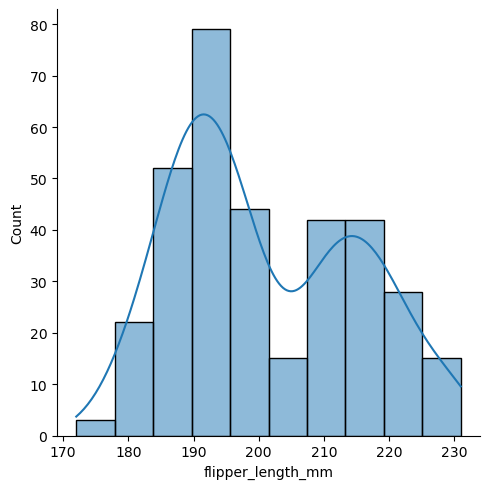

In [3]:
# Гистограмма длины крыла и ядерная оценка плотности
sns.displot(x='flipper_length_mm', kde=True, data=penguins)
plt.show()
# Если не закоментировать, то второй графи не отрисовывается

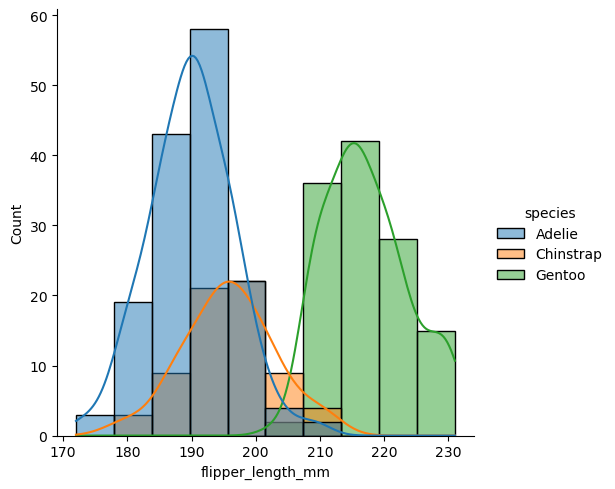

In [4]:
# Наблюдаем несколько распределений (длина крыла зависит от вида пингвина)
# Добавим расцветку для каждого вида
sns.displot(x='flipper_length_mm', kde=True, hue='species', data=penguins)
plt.show()

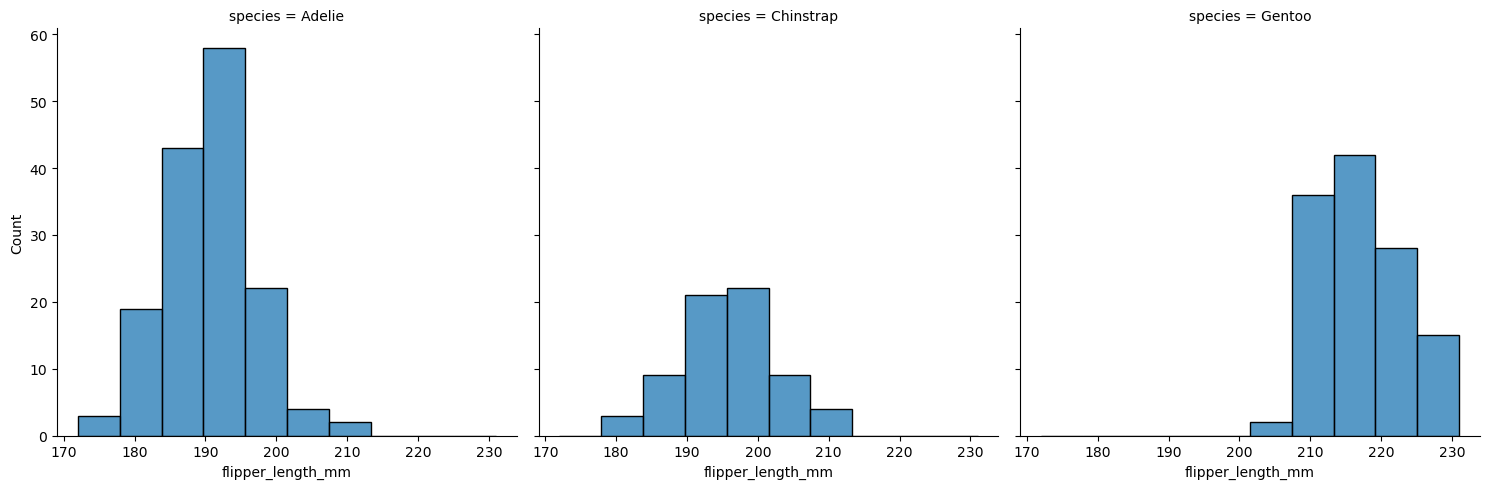

In [5]:
sns.displot(x='flipper_length_mm', col='species', data=penguins)
plt.show()

<AxesSubplot:title={'center':'Ядерная оценка плотности'}>

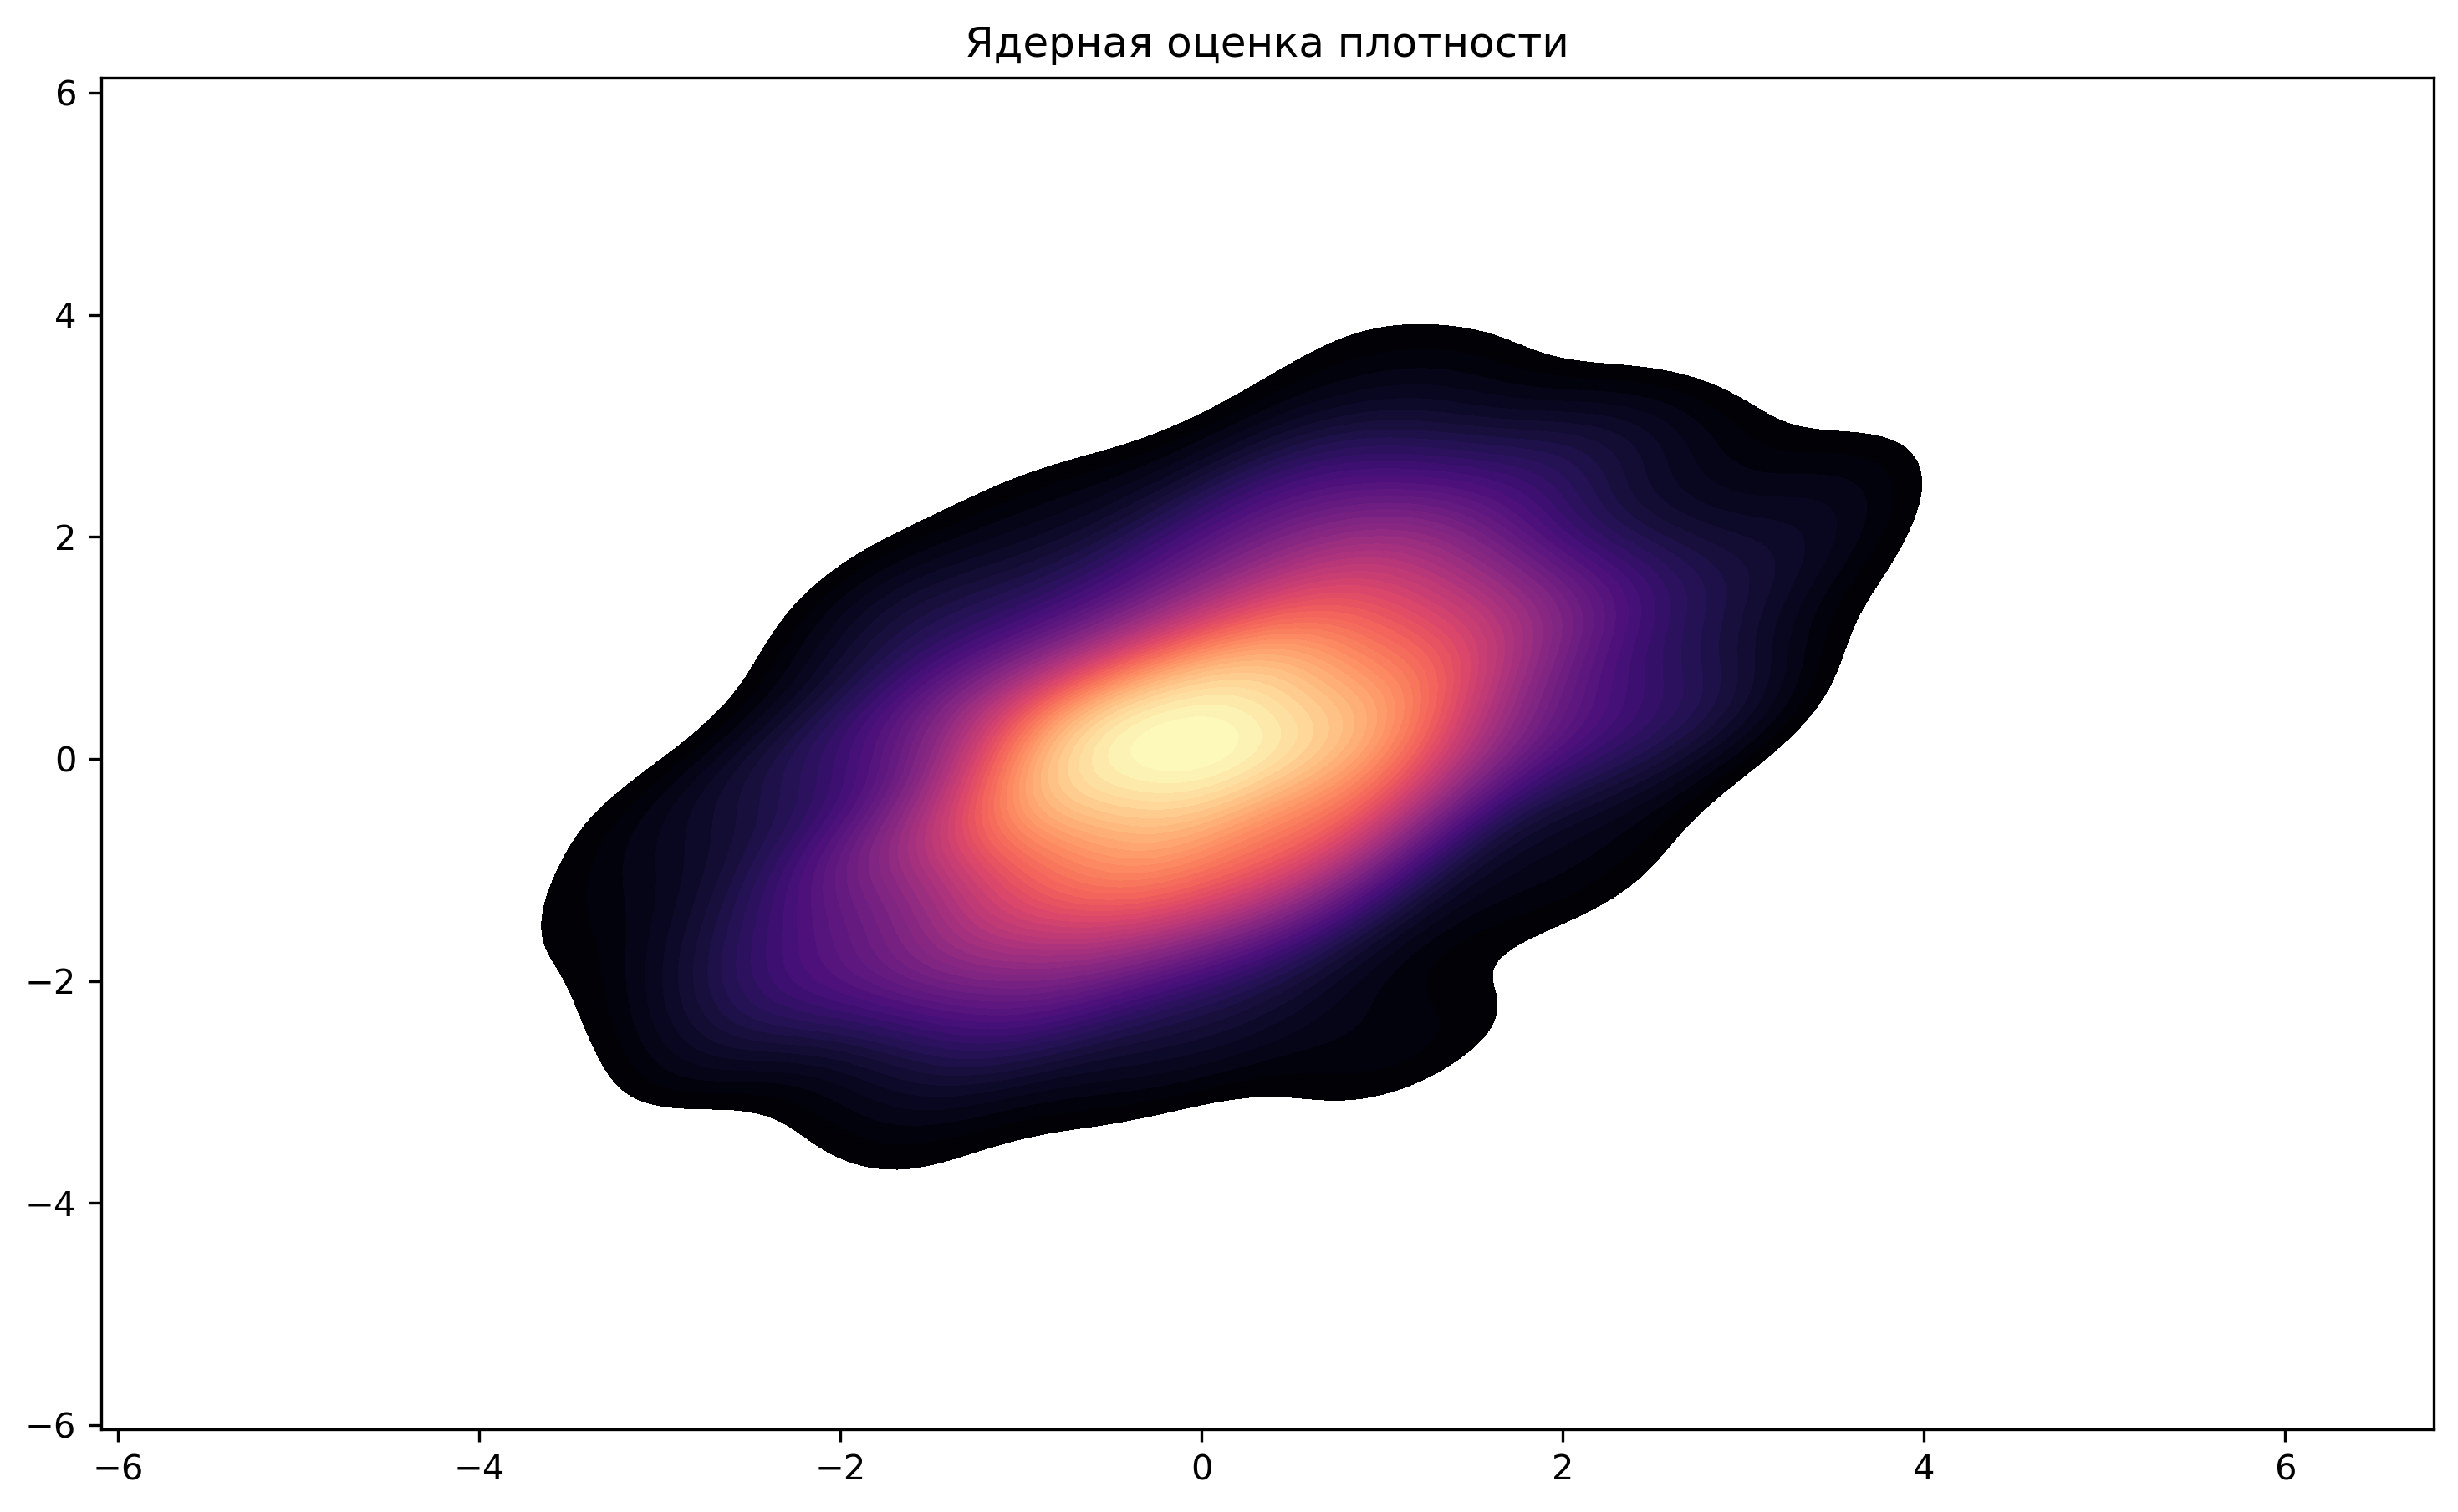

In [6]:
# Многомерная оценка плотности
x, y = sps.multivariate_normal(cov=[[2, 1], [1, 2]]).rvs(size=1000).T
plt.figure(figsize=(12,7), dpi=300)
plt.title("Ядерная оценка плотности")
sns.kdeplot(x=x, y=y, n_levels=51, shade=True, cmap="magma")

In [7]:
# Ирисы Фишера
iris = sns.load_dataset('iris')
iris.head()

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa


In [8]:
# Выделяем отдельна каждый тип
setosa = iris.loc[iris.species == 'setosa']
virginica = iris.loc[iris.species == 'virginica']
versicolor = iris.loc[iris.species == 'versicolor']

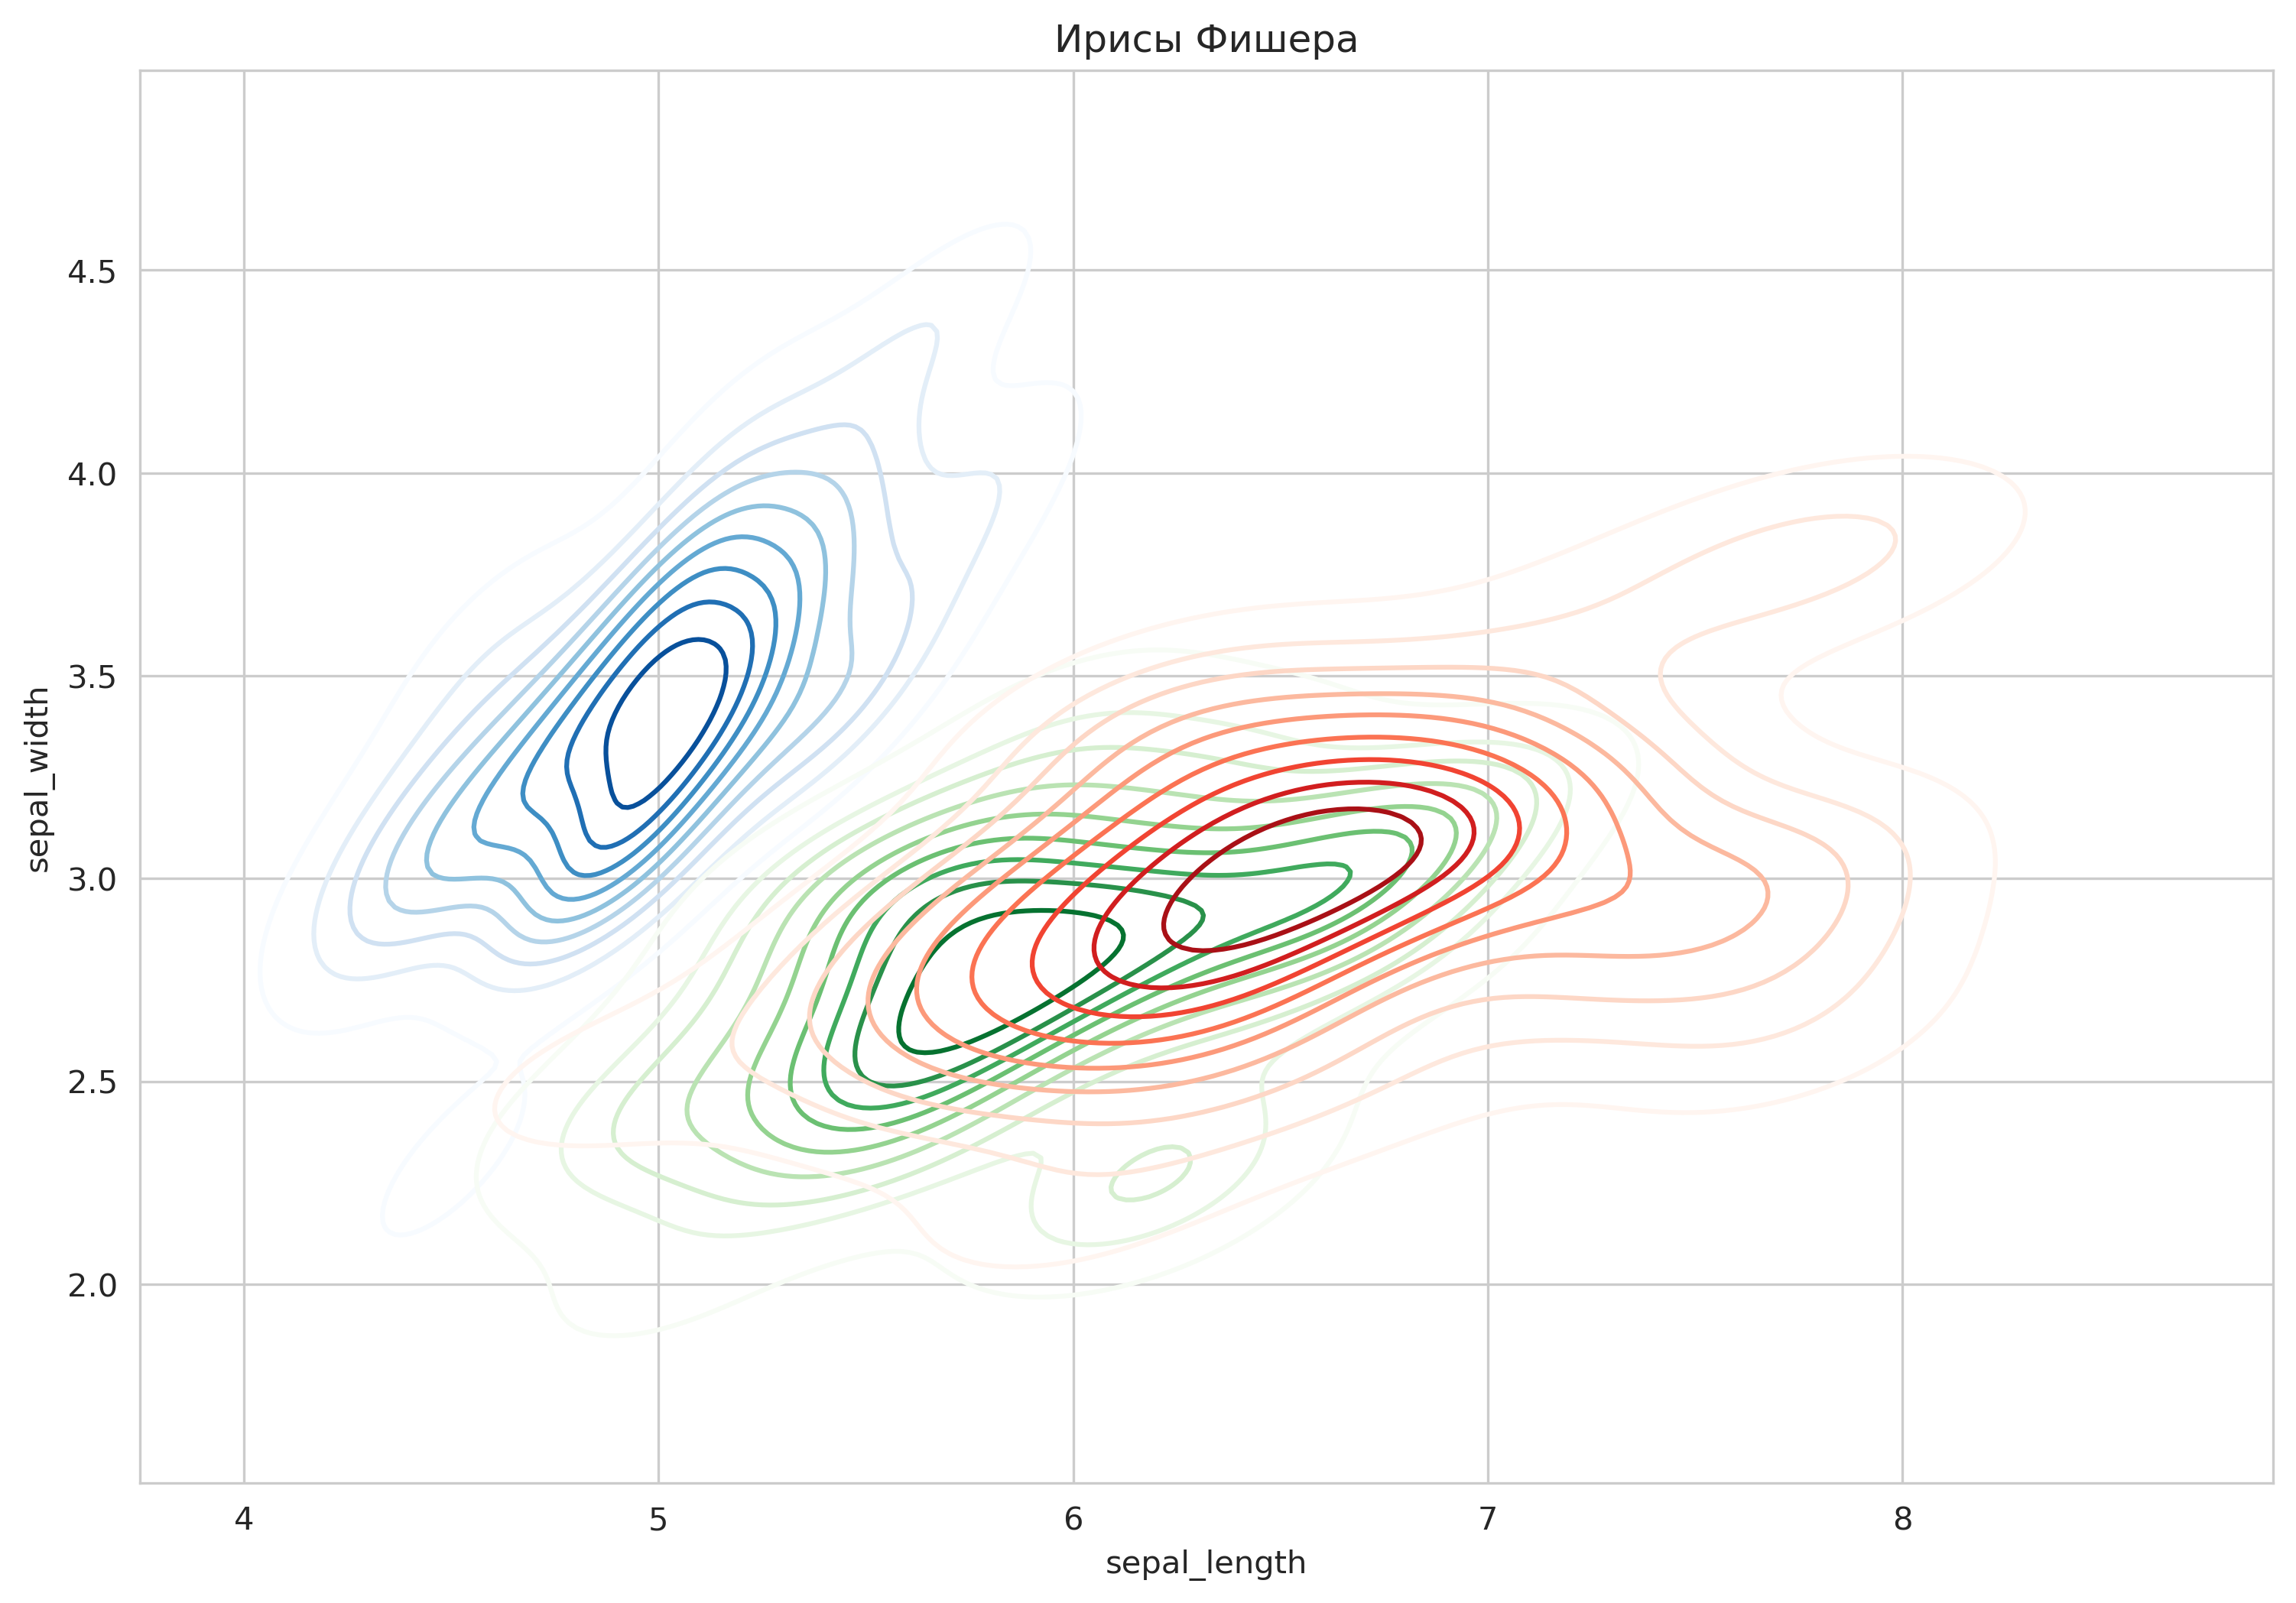

In [9]:
plt.figure(figsize=(12, 8), dpi=300)
with sns.axes_style("whitegrid"):
    ax = sns.kdeplot(x=setosa.sepal_length, y=setosa.sepal_width,
                    label="setosa", cmap="Blues")
    ax = sns.kdeplot(x=versicolor.sepal_length, y=versicolor.sepal_width,
                    label="versicolor", cmap="Greens")
    ax = sns.kdeplot(x=virginica.sepal_length, y=virginica.sepal_width,
                    label="virginica", cmap="Reds")
    ax.set_title("Ирисы Фишера")    
plt.show()

<AxesSubplot:>

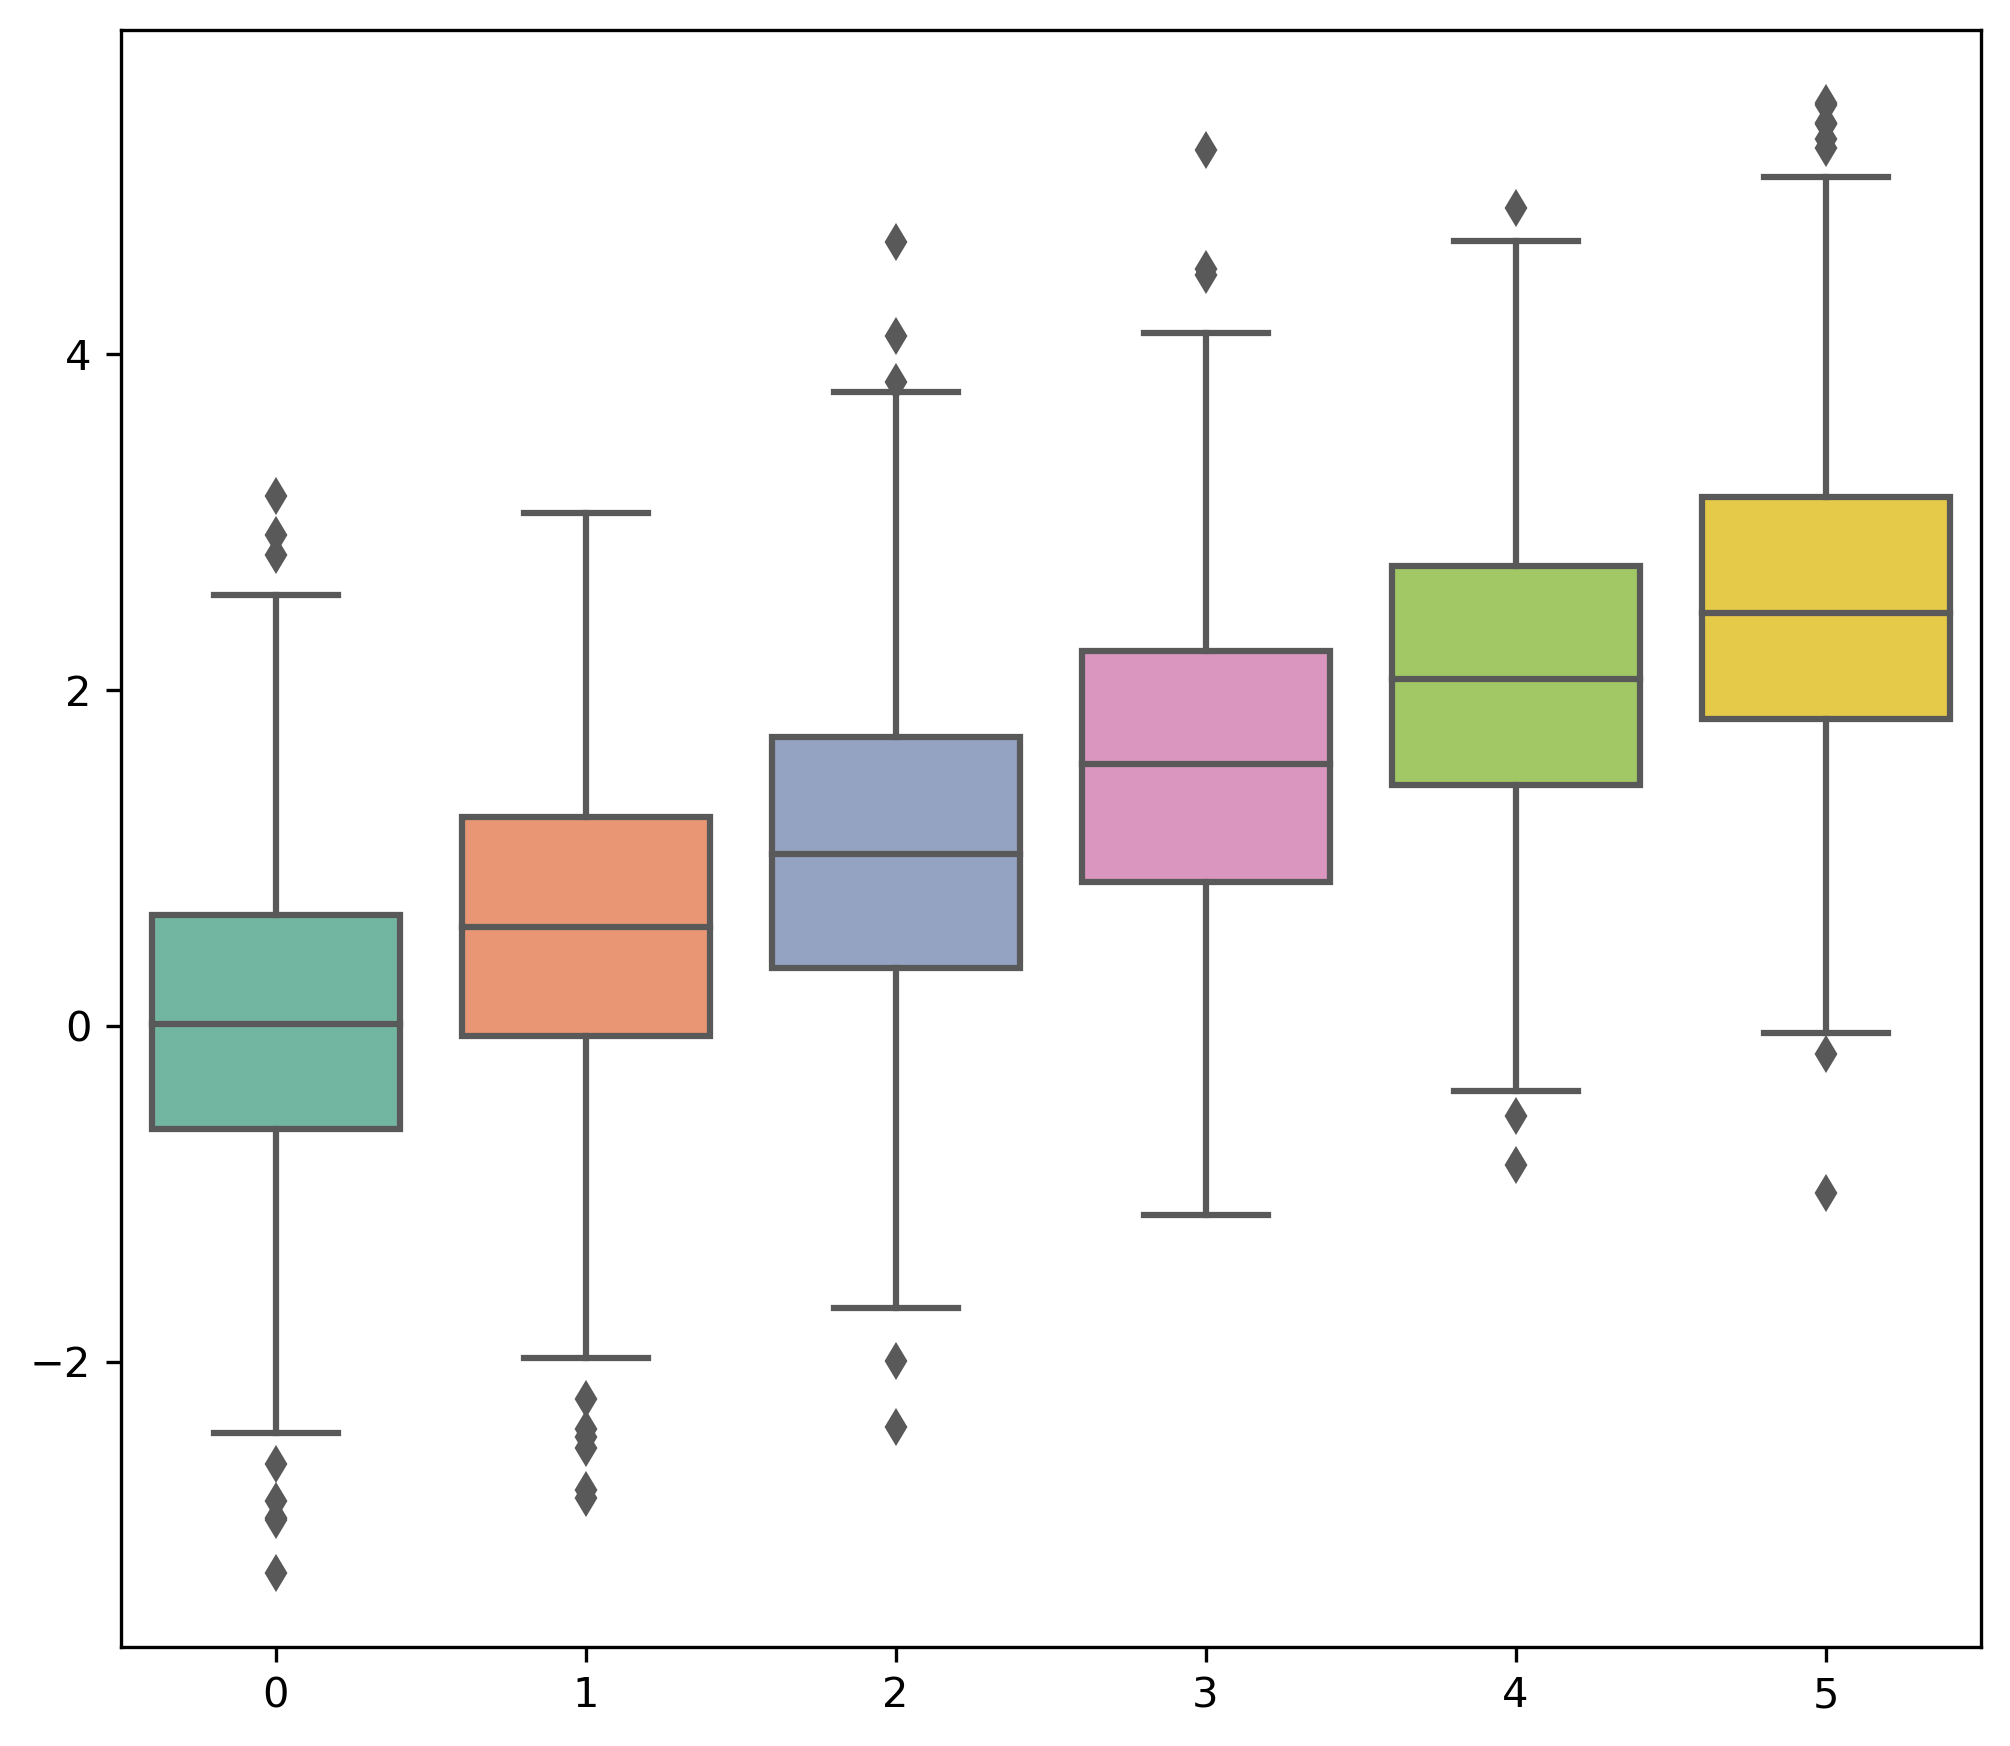

In [12]:
# Ящики с усами
data = sps.norm.rvs(size=(1000, 6)) + np.arange(6) / 2
plt.figure(figsize=(8, 7), dpi=300)
sns.boxplot(data=data, palette="Set2")

<AxesSubplot:>

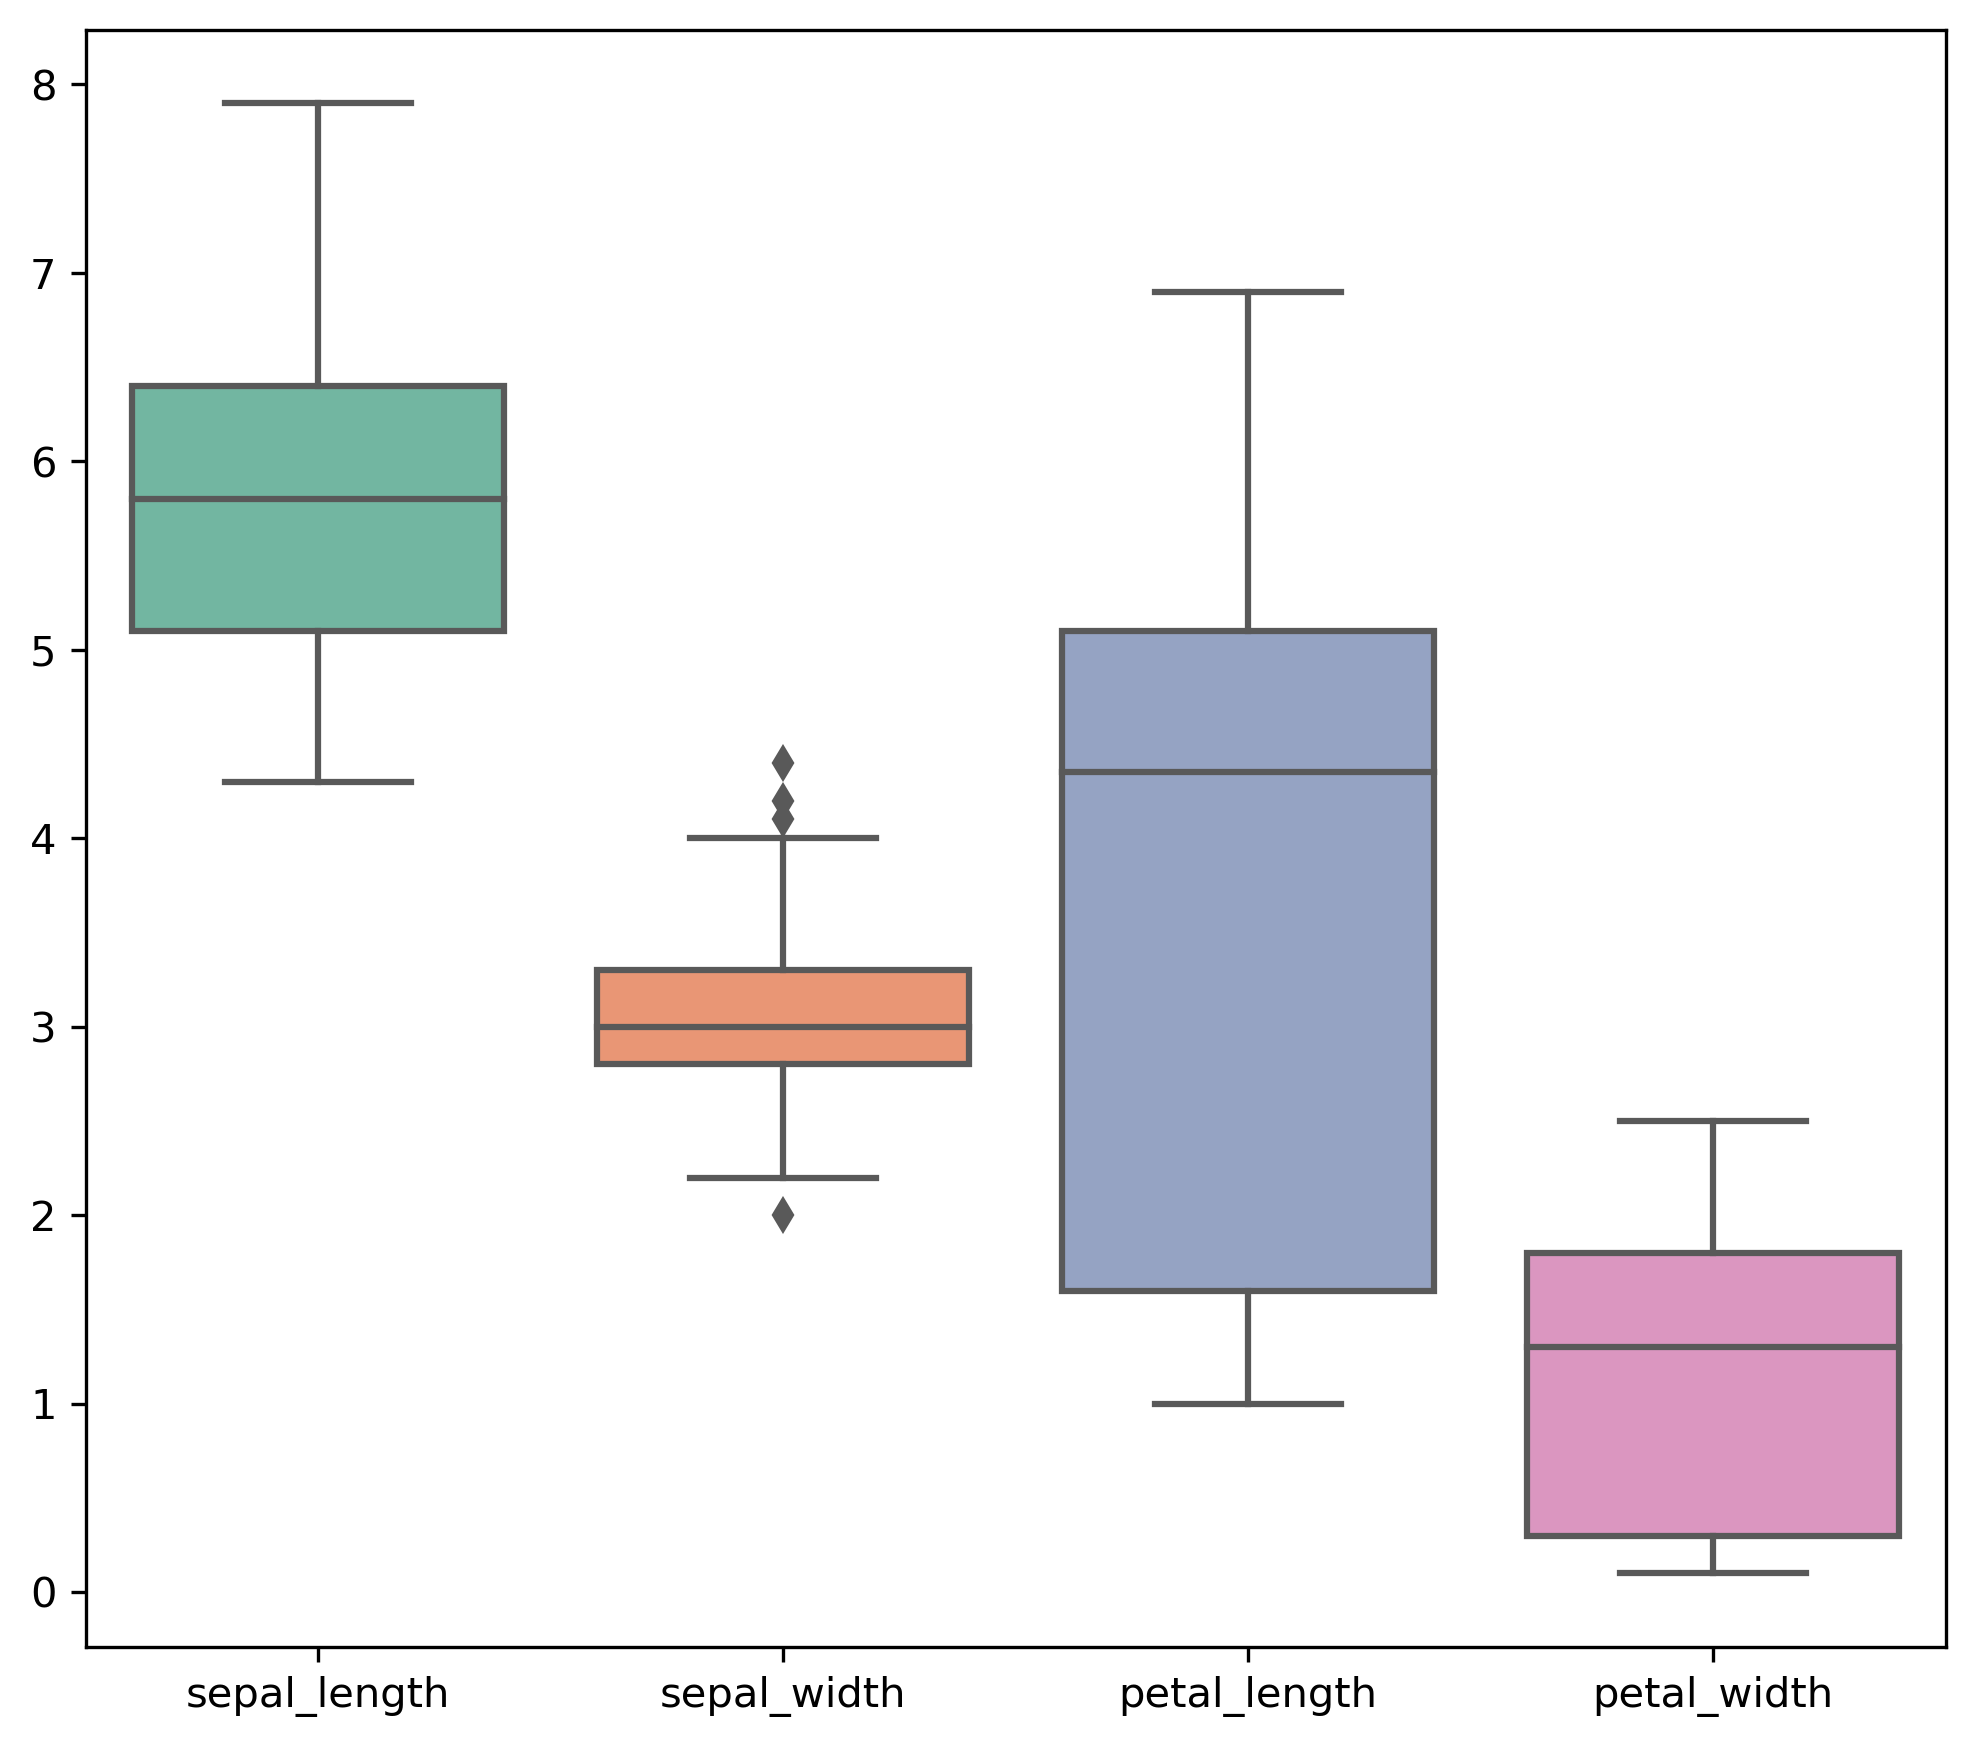

In [18]:
plt.figure(figsize=(8, 7), dpi=300)
sns.boxplot(data=iris, palette="Set2")

In [19]:
# Датасет Чаевые
tips = sns.load_dataset('tips')
tips.head()

,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,Female,No,Sun,Dinner,2
1,10.34,1.66,Male,No,Sun,Dinner,3
2,21.01,3.50,Male,No,Sun,Dinner,3
3,23.68,3.31,Male,No,Sun,Dinner,2
4,24.59,3.61,Female,No,Sun,Dinner,4


Text(0, 0.5, 'Размер чаевых')

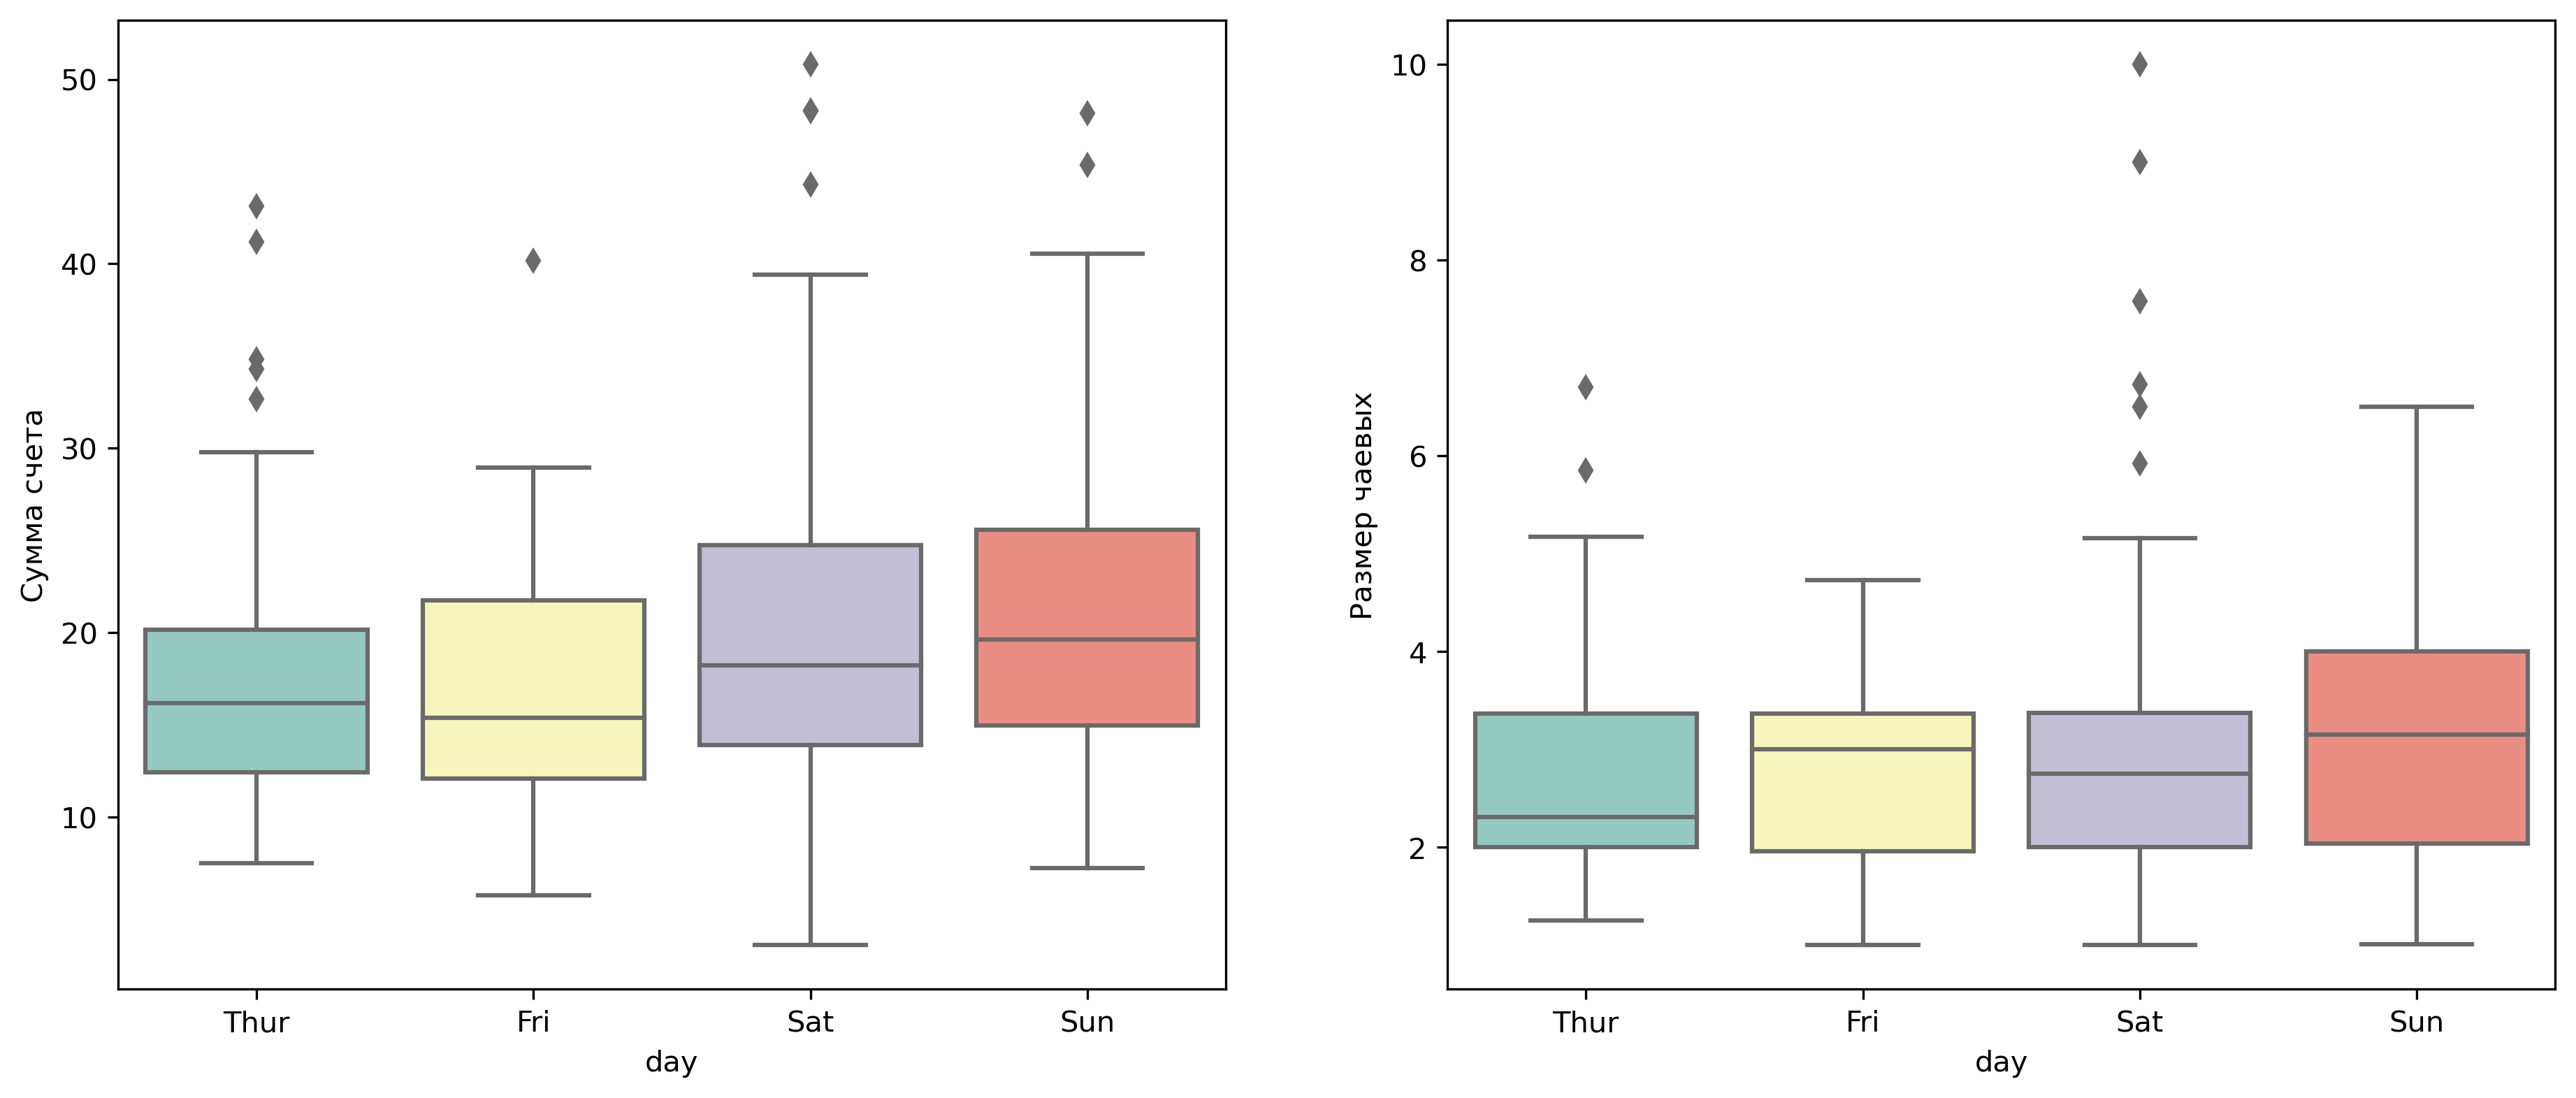

In [20]:
plt.figure(figsize=(15, 6), dpi=300)
plt.subplot(121)
sns.boxplot(x='day', y='total_bill', data=tips, palette='Set3')
plt.ylabel('Сумма счета')
plt.subplot(122)
sns.boxplot(x='day', y='tip', data=tips, palette='Set3')
plt.ylabel('Размер чаевых')

Text(0, 0.5, 'Размер чаевых')

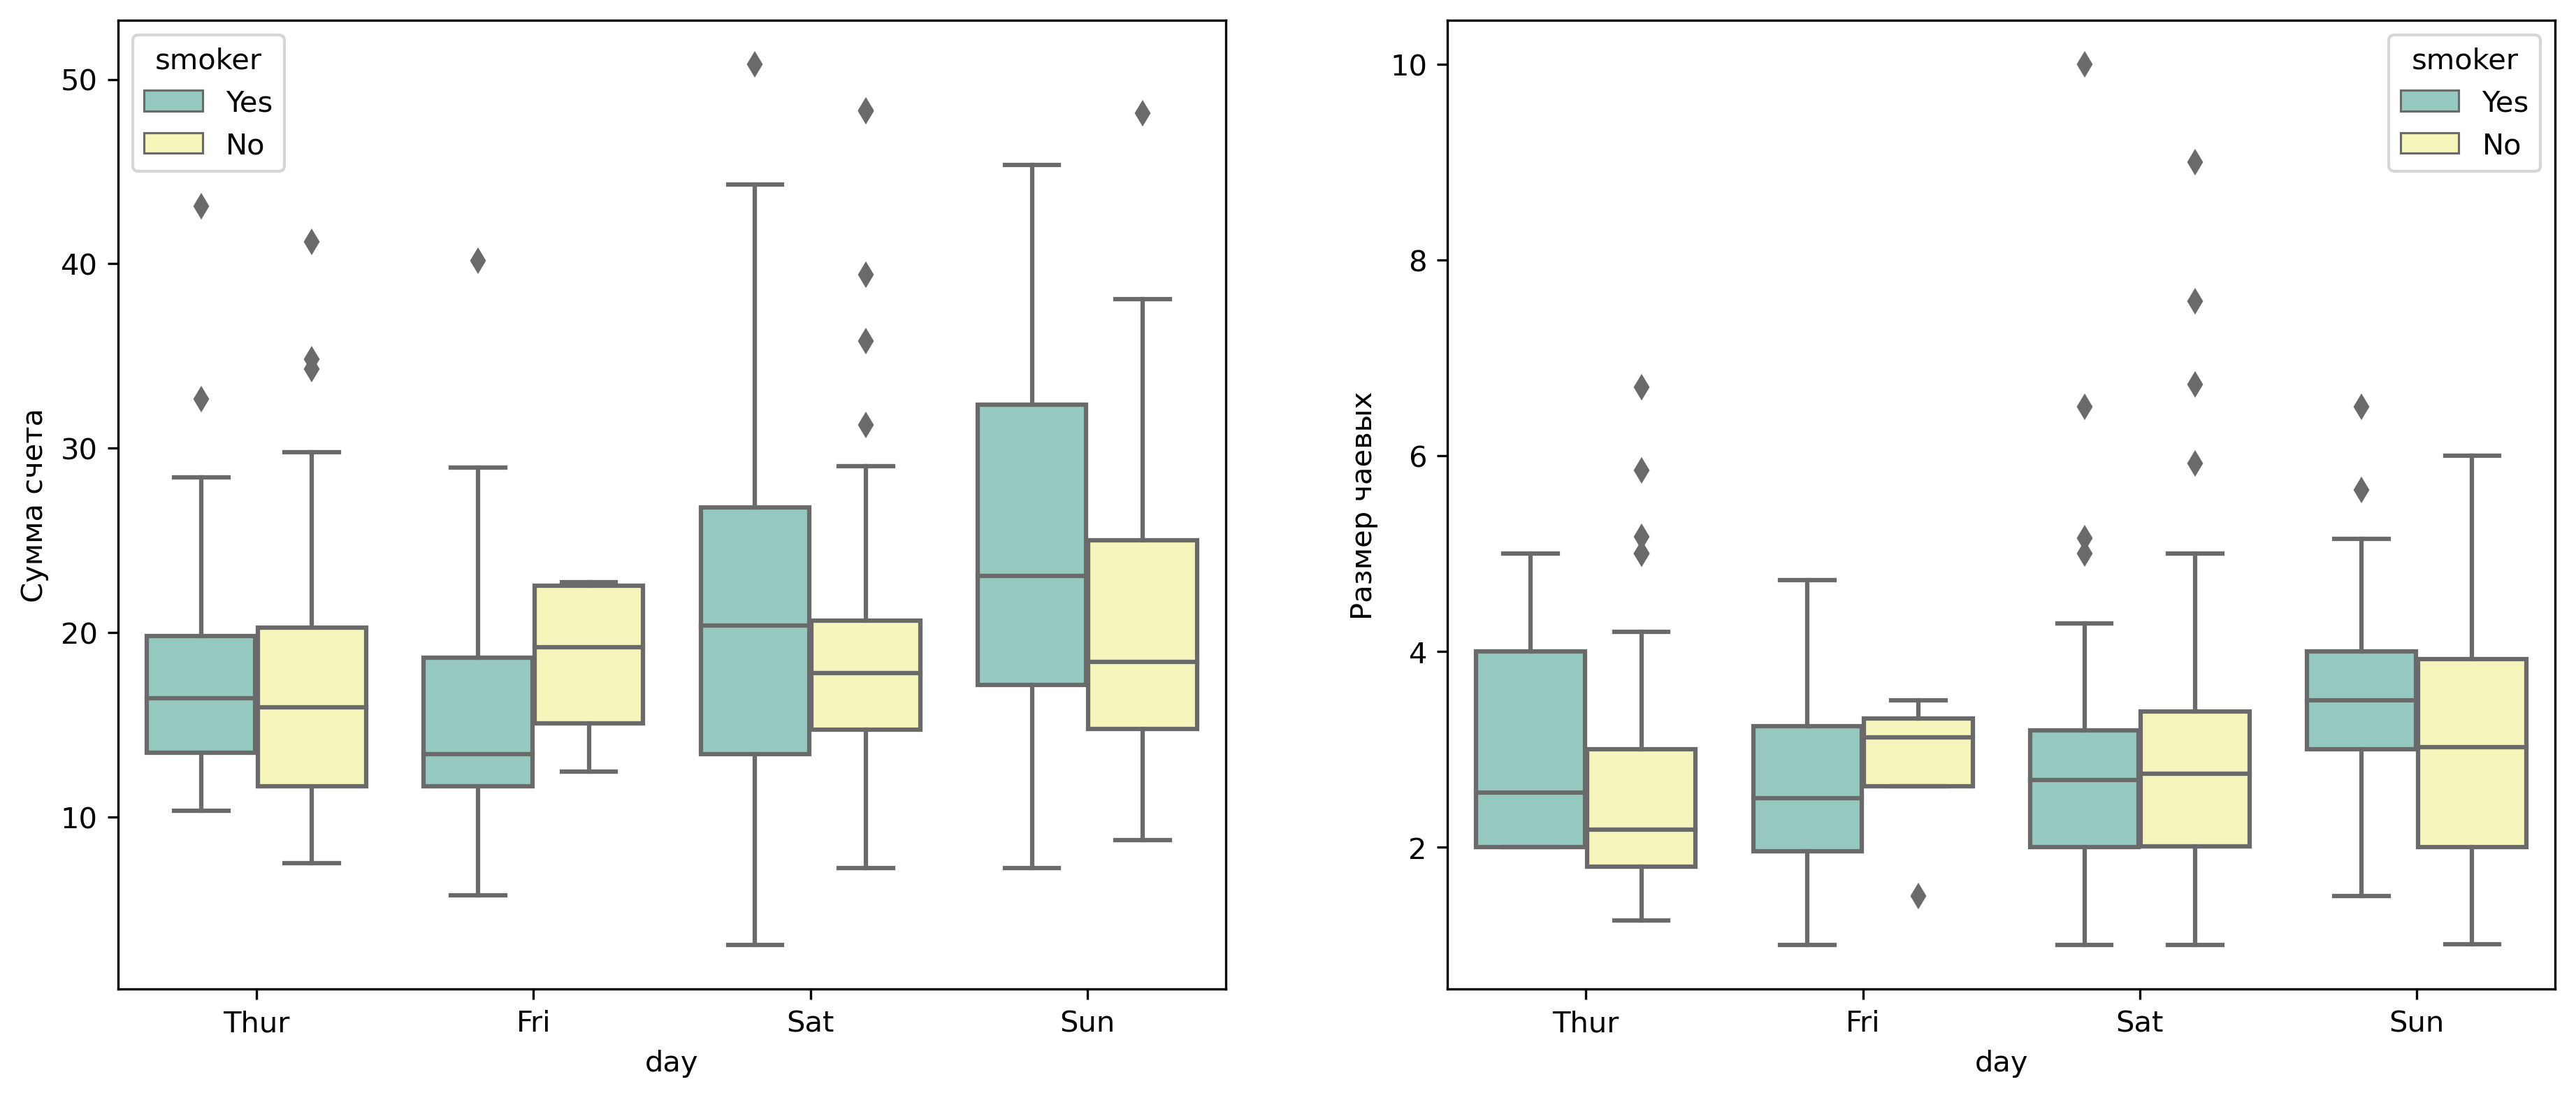

In [21]:
plt.figure(figsize=(15, 6), dpi=300)
plt.subplot(121)
sns.boxplot(x='day', y='total_bill', data=tips, palette='Set3', hue='smoker')
plt.ylabel('Сумма счета')
plt.subplot(122)
sns.boxplot(x='day', y='tip', data=tips, palette='Set3', hue='smoker')
plt.ylabel('Размер чаевых')

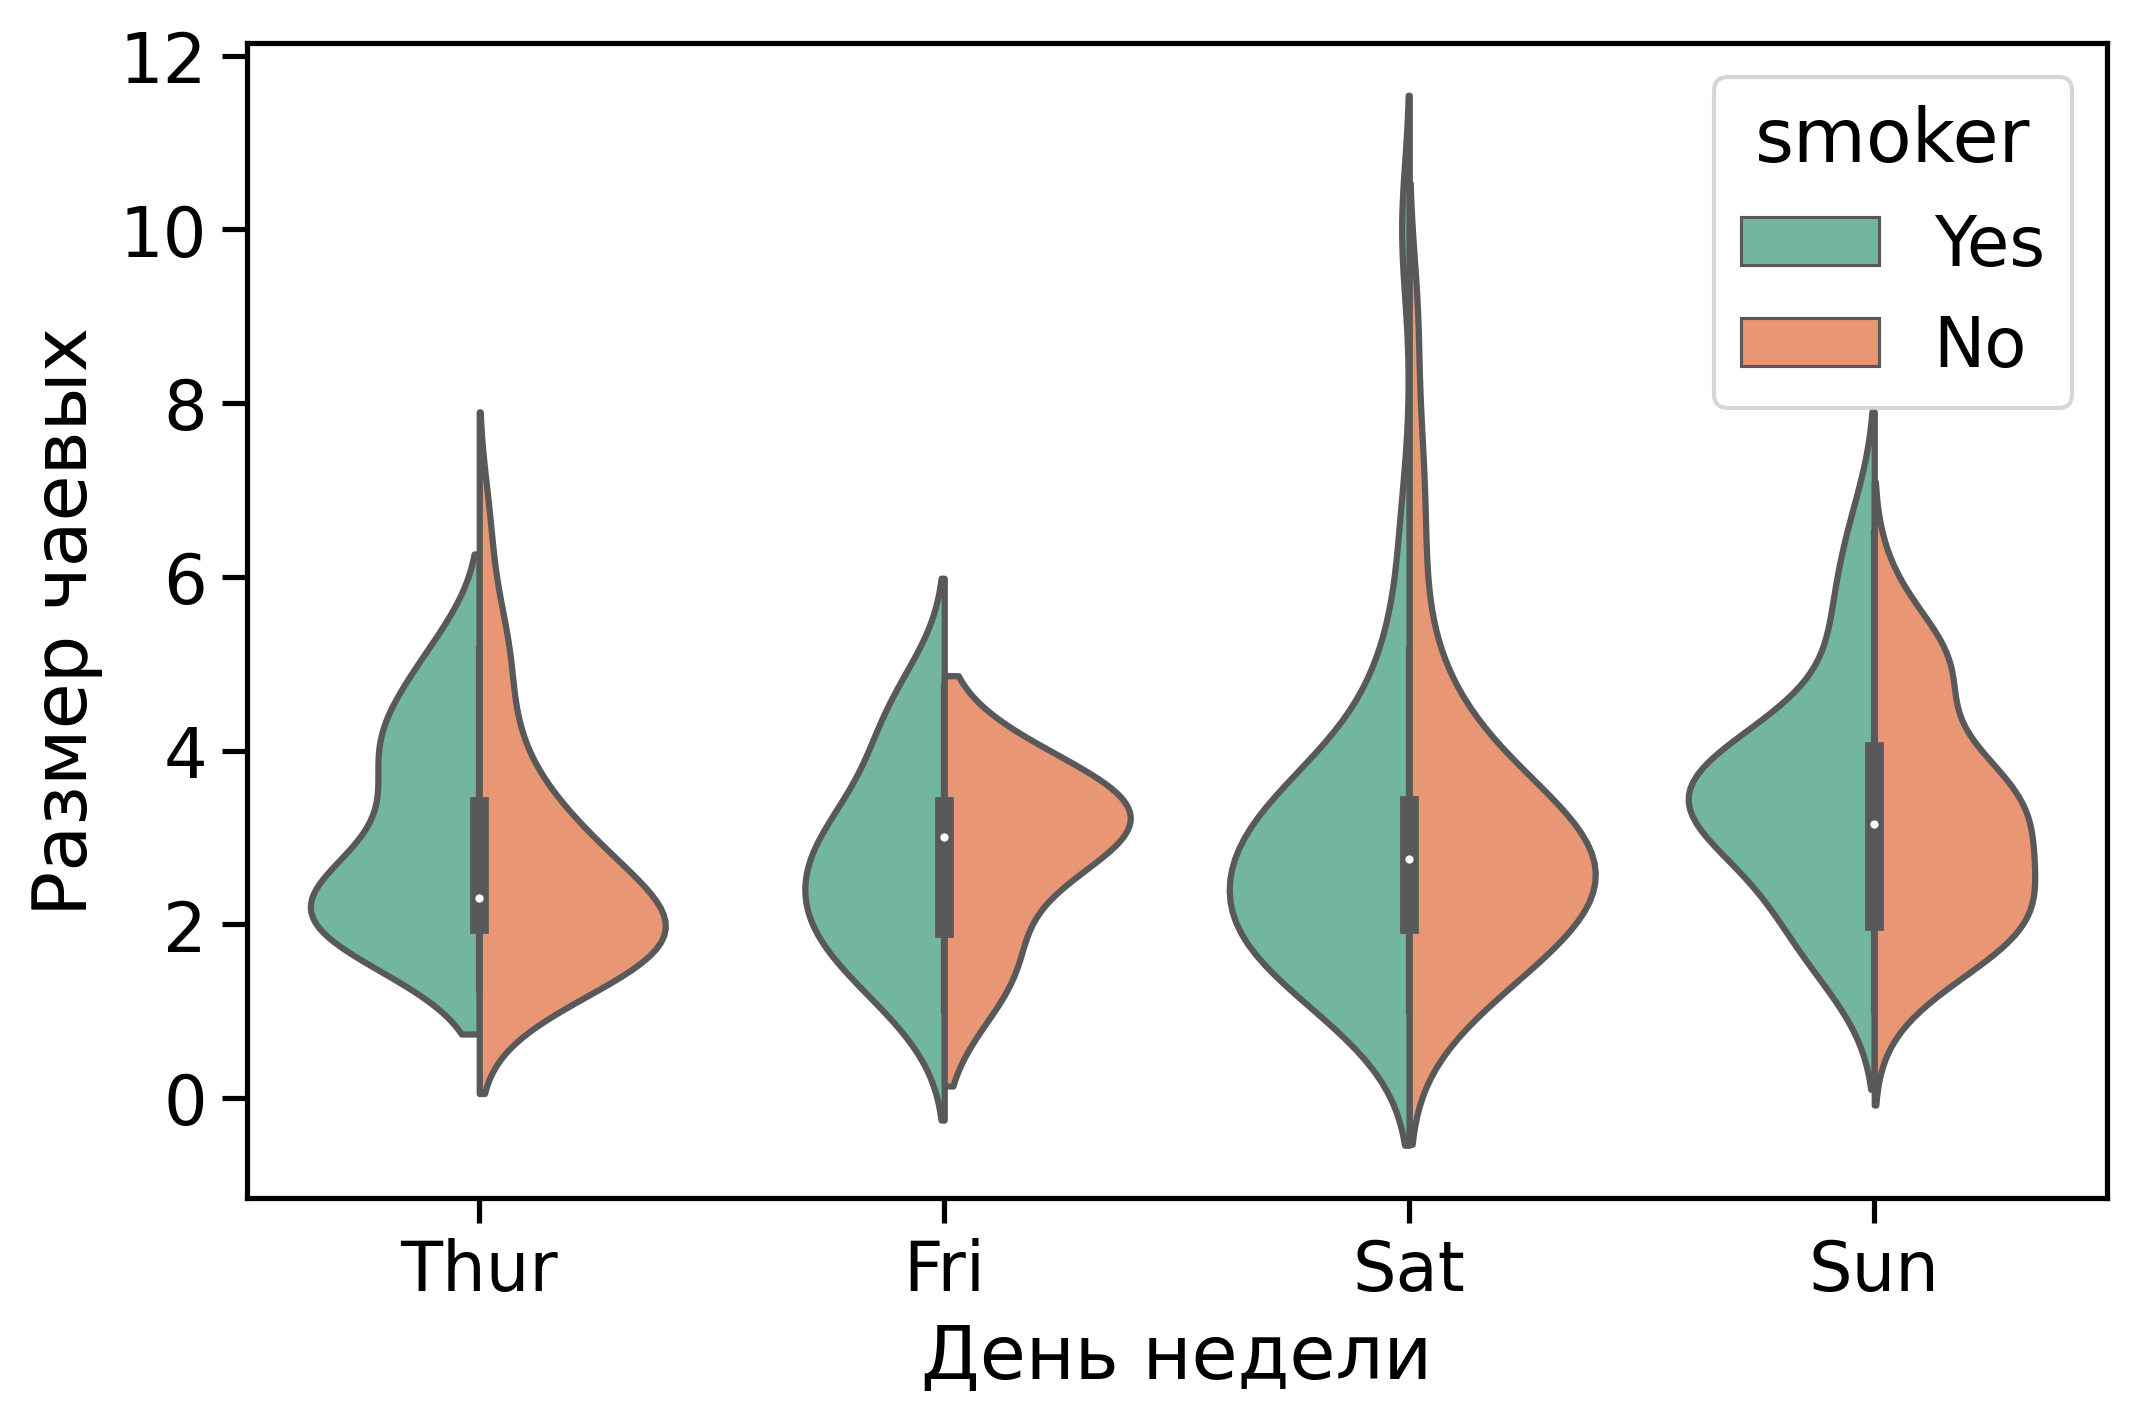

In [26]:
with sns.plotting_context("notebook", font_scale=1.5):
    plt.figure(figsize=(8, 5), dpi=300)
    sns.violinplot(x="day", y="tip", hue="smoker",
                  data=tips, palette="Set2", split=True)
    plt.ylabel('Размер чаевых')
    plt.xlabel('День недели')

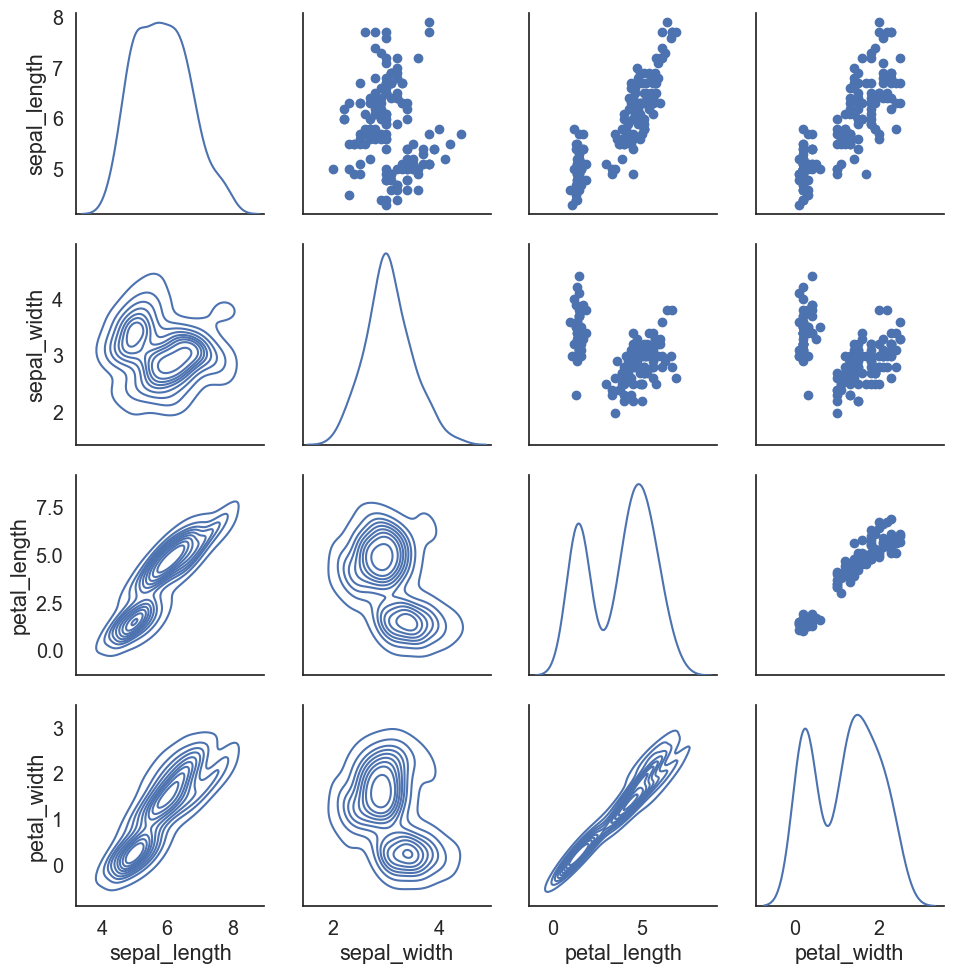

In [27]:
# Попарные распределения
sns.set(style='white', font_scale=1.3)
g = sns.PairGrid(iris, diag_sharey=False)
g.map_lower(sns.kdeplot)
g.map_upper(plt.scatter)
g.map_diag(sns.kdeplot)

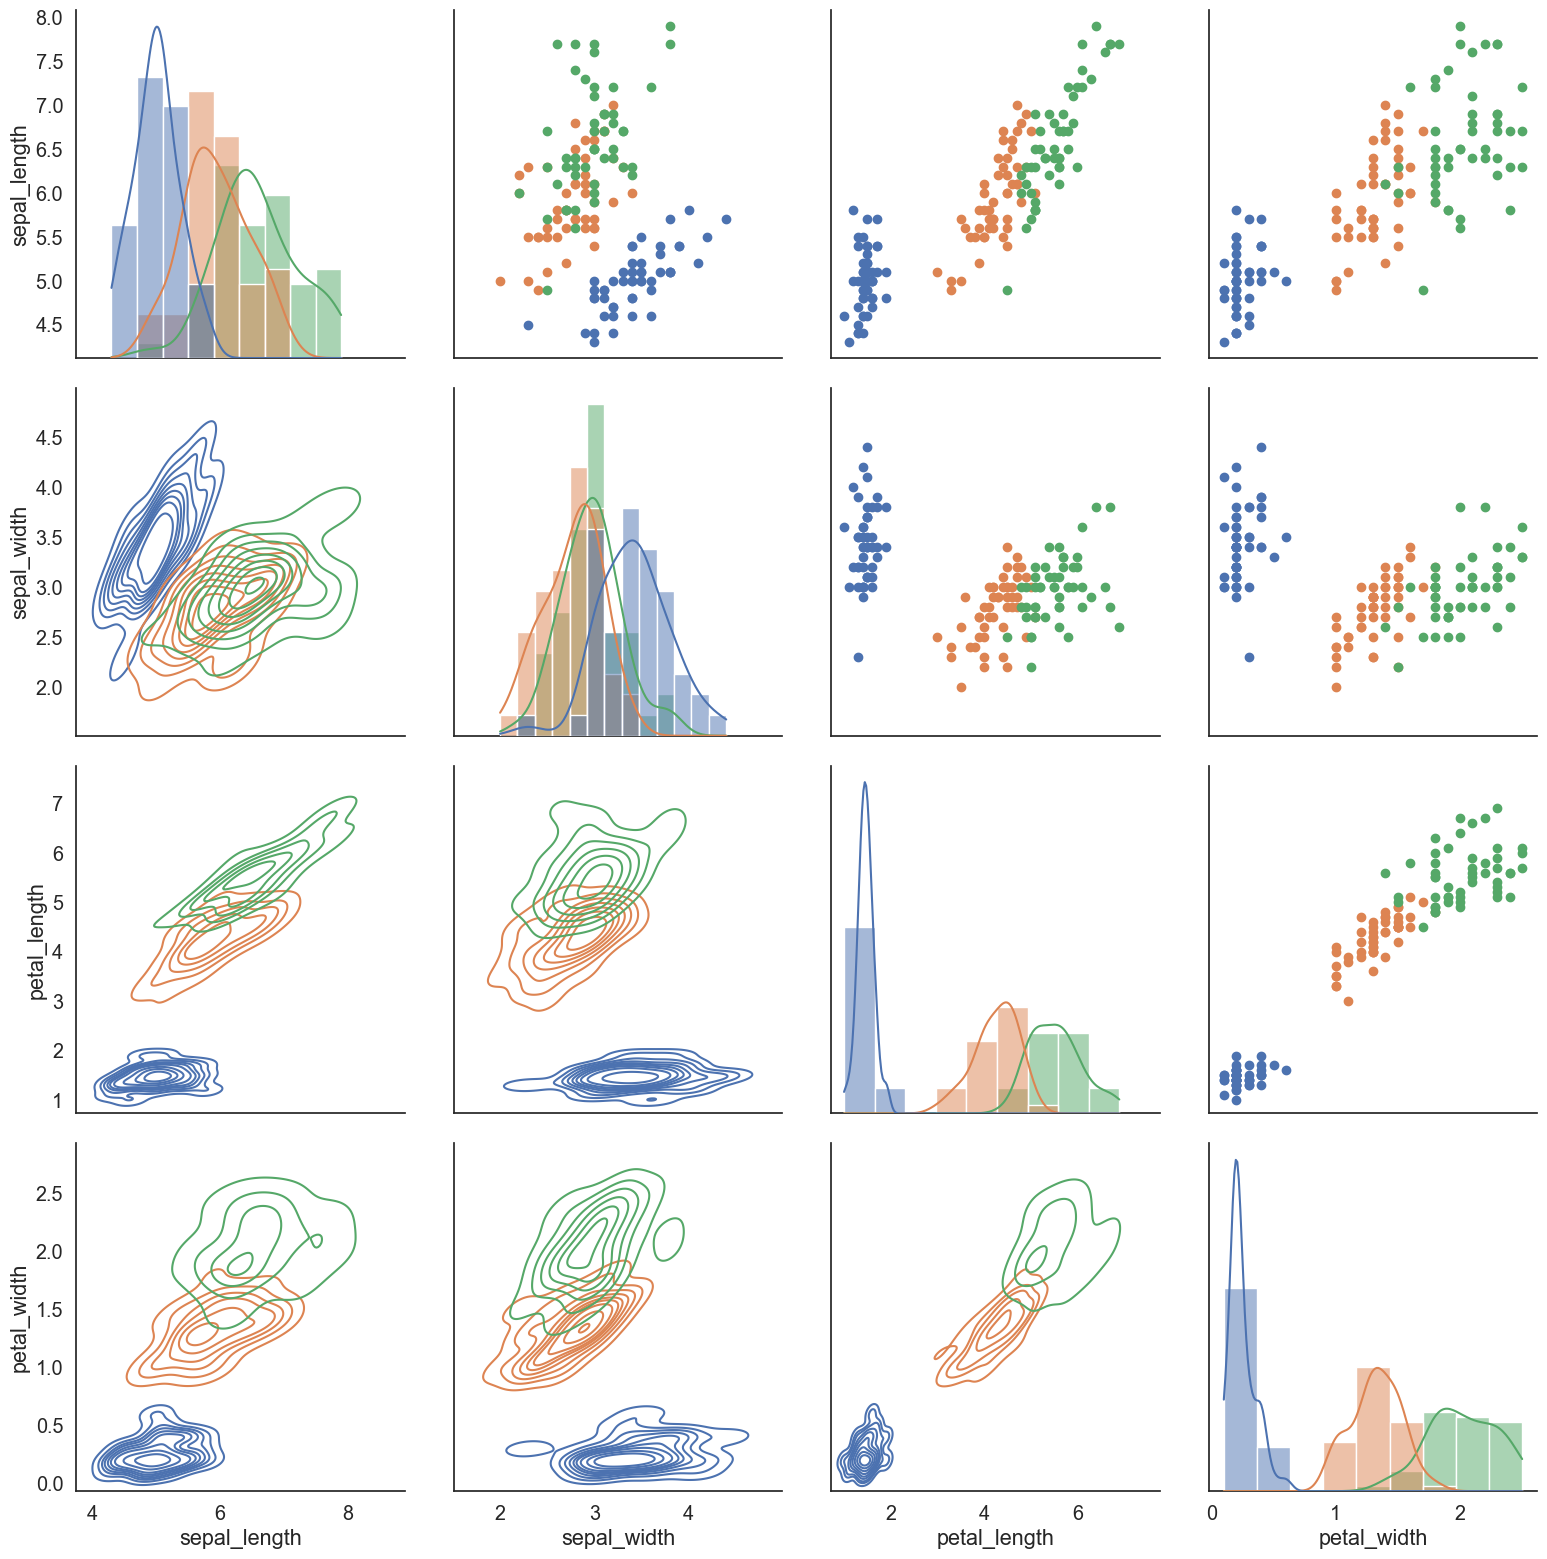

In [28]:
g = sns.PairGrid(iris, hue='species', height=4, diag_sharey=False)
g.map_lower(sns.kdeplot)
g.map_upper(plt.scatter)
g.map_diag(sns.histplot, kde=True)

In [29]:
# Данные о кол-ве пассажиров самолетов
flights_long = sns.load_dataset('flights')
flights_long.head()

,year,month,passengers
0,1949,Jan,112
1,1949,Feb,118
2,1949,Mar,132
3,1949,Apr,129
4,1949,May,121


In [31]:
# Создание сводной таблицы
flights = flights_long.pivot_table(index='month',
                                   columns='year',
                                   values='passengers')
flights

year,1949,1950,1951,1952,1953,1954,1955,1956,1957,1958,1959,1960
month,,,,,,,,,,,,
Jan,112,115,145,171,196,204,242,284,315,340,360,417
Feb,118,126,150,180,196,188,233,277,301,318,342,391
Mar,132,141,178,193,236,235,267,317,356,362,406,419
Apr,129,135,163,181,235,227,269,313,348,348,396,461
May,121,125,172,183,229,234,270,318,355,363,420,472
Jun,135,149,178,218,243,264,315,374,422,435,472,535
Jul,148,170,199,230,264,302,364,413,465,491,548,622
Aug,148,170,199,242,272,293,347,405,467,505,559,606
Sep,136,158,184,209,237,259,312,355,404,404,463,508


(0.0, 12.0)

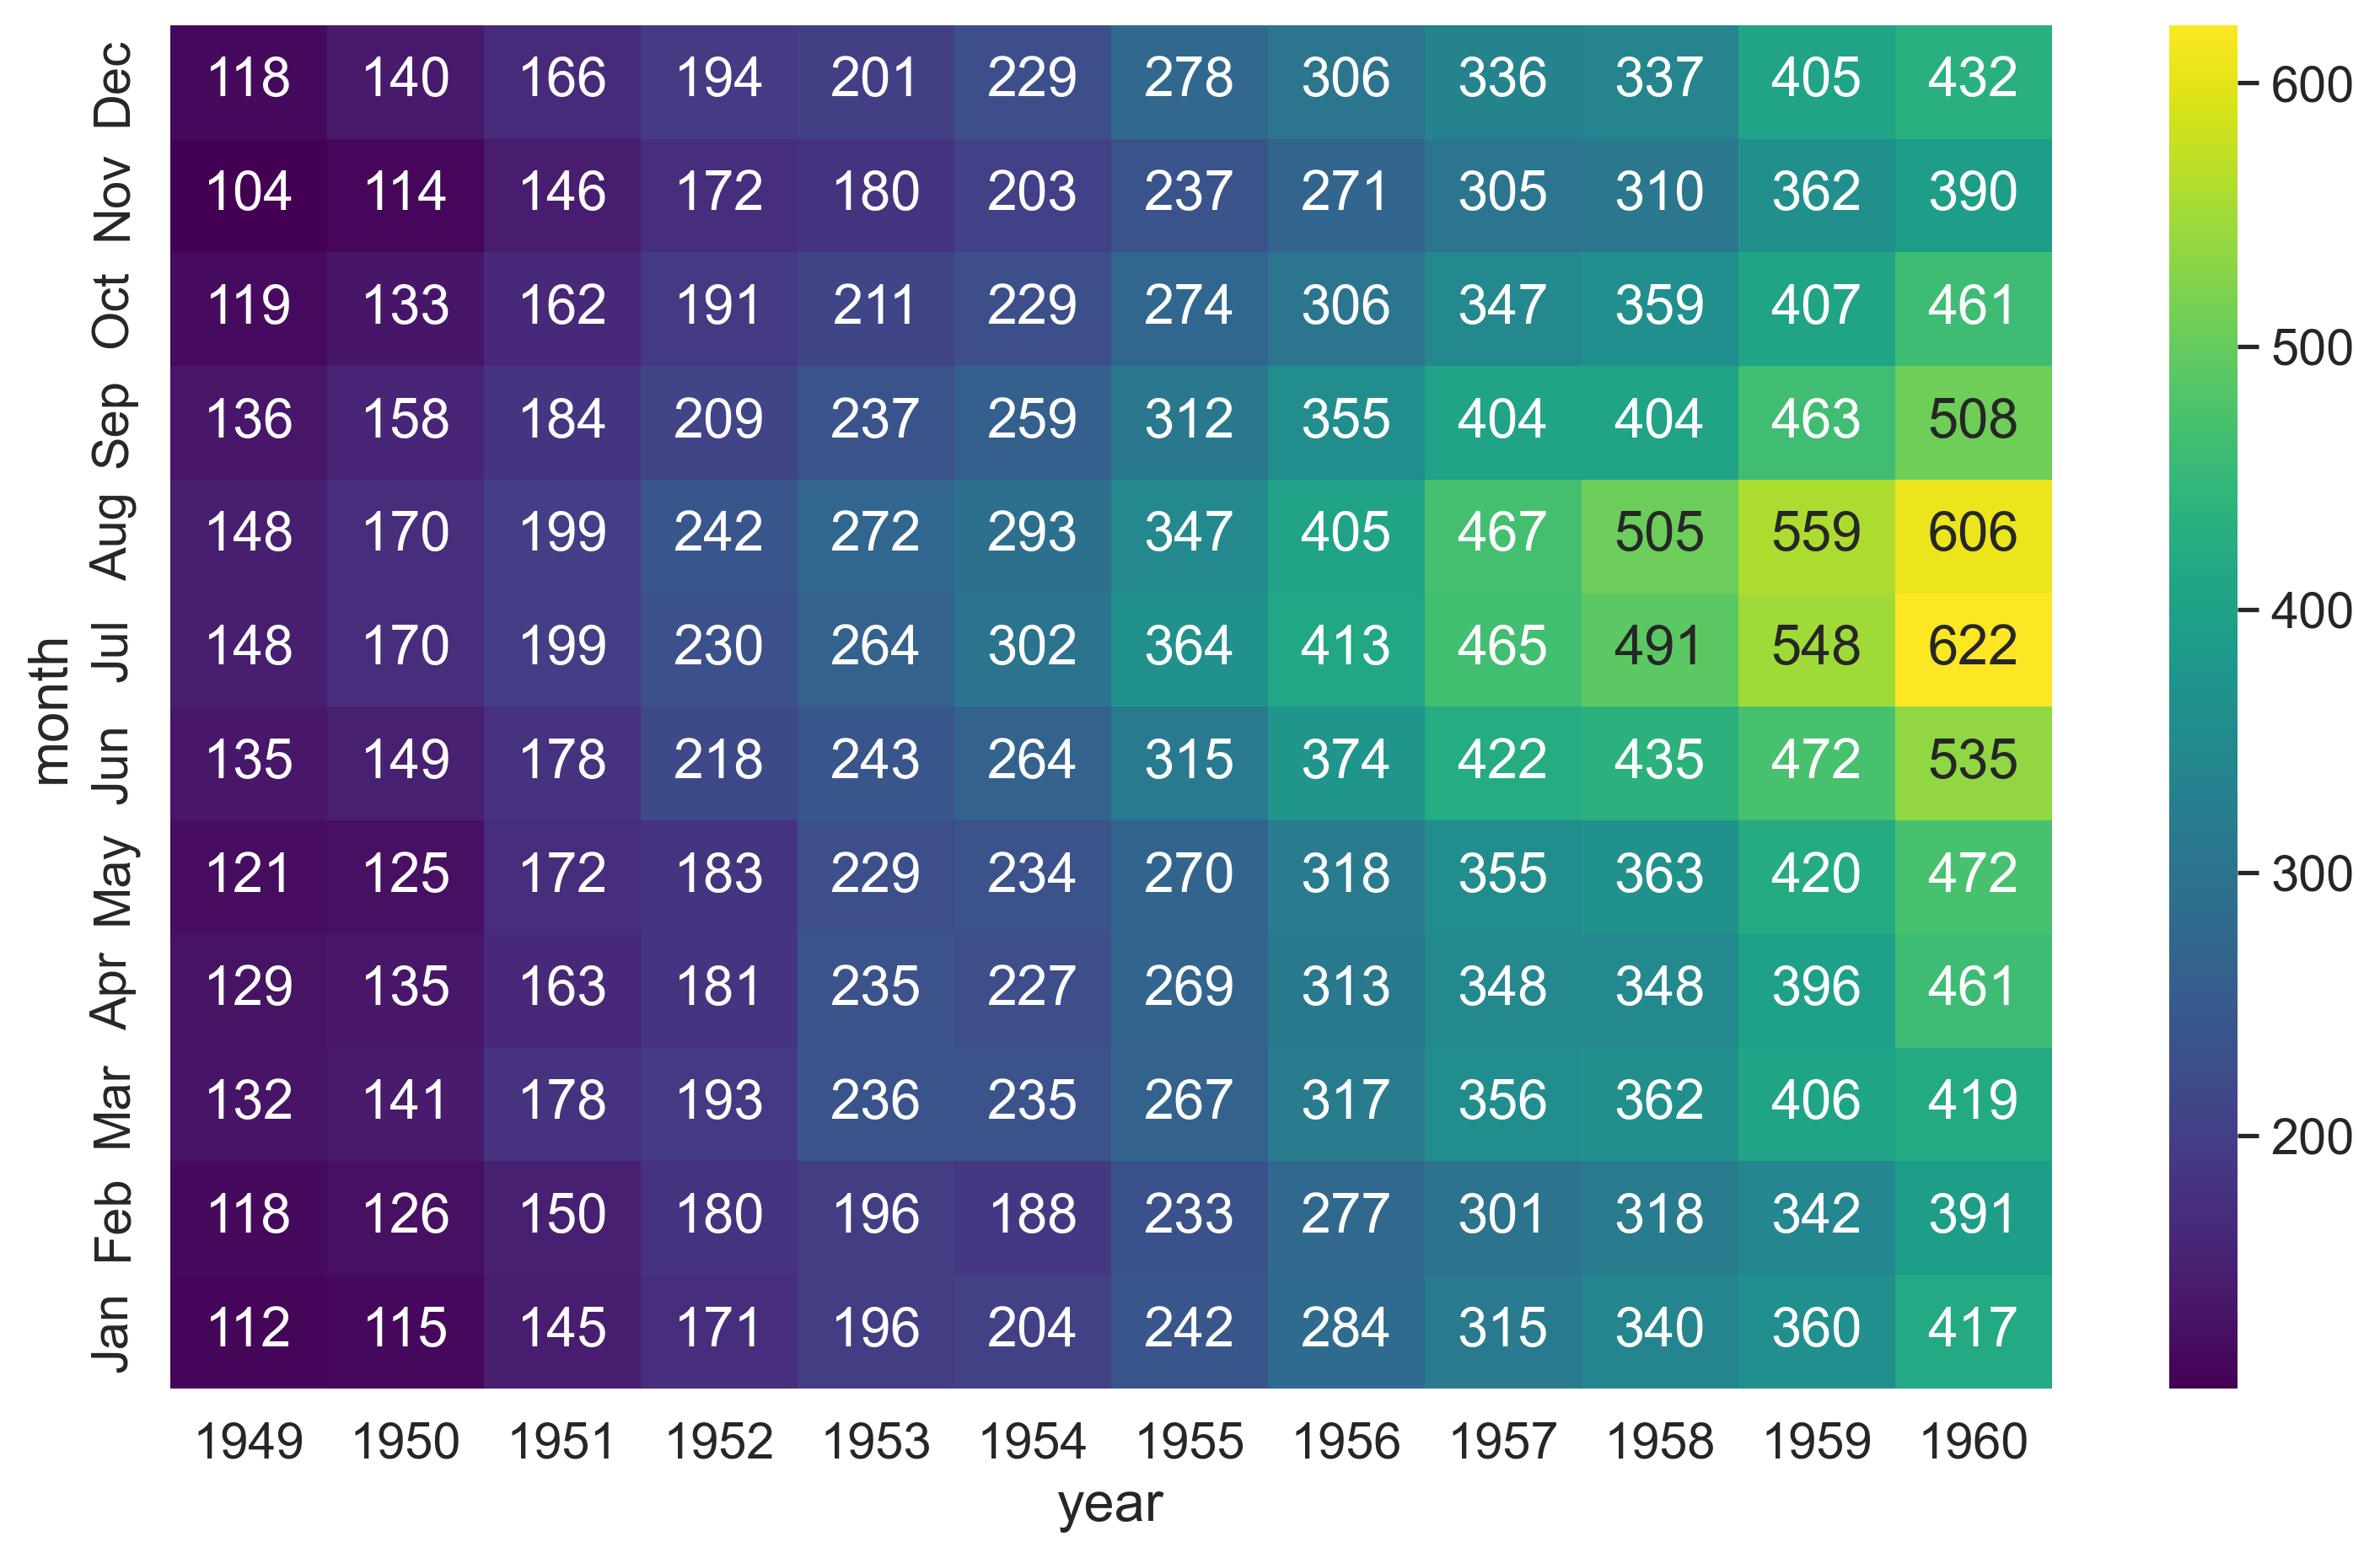

In [35]:
# Визуализация с помощью тепловой карты
sns.set(font_scale=1.3)
f, ax = plt.subplots(figsize=(12, 7), dpi=300)
sns.heatmap(flights, annot=True, fmt='d', ax=ax, cmap='viridis')
plt.ylim((0, 12))